In [7]:
import pandas as pd

In [8]:
calendar = pd.read_csv("calendar.csv",sep=",")
listings = pd.read_csv("listings.csv",sep=",")
reviews = pd.read_csv("reviews.csv",sep=",")

In [9]:
listings.groupby('host_id').count().reset_index()['price']

0       4
1       1
2       2
3       1
4       1
       ..
2746    1
2747    1
2748    1
2749    1
2750    1
Name: price, Length: 2751, dtype: int64

In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

## Nettoyage des données :

In [11]:
listings['last_scraped'].unique()

array(['2016-01-04'], dtype=object)

In [12]:
listings.drop(columns=['last_scraped','listing_url','scrape_id','last_scraped'],inplace=True)

In [13]:
listings['summary']

0                                                     NaN
1       Chemically sensitive? We've removed the irrita...
2       New modern house built in 2013.  Spectacular s...
3       A charming apartment that sits atop Queen Anne...
4       Cozy family craftman house in beautiful neighb...
                              ...                        
3813    Our 3BR/2BA house boasts incredible views of t...
3814    800 square foot 1 bedroom basement apartment w...
3815    Very comfortable lower unit. Quiet, charming m...
3816    Cozy studio condo in the heart on Madison Park...
3817    All hardwood floors, fireplace, 65" TV with Xb...
Name: summary, Length: 3818, dtype: object

In [14]:
#in summary column, we have already those informations in other columns (bedrooms,bathrooms...)
listings.drop(columns=['summary'],inplace=True)

In [15]:
listings['space'].head(5)

0    Make your self at home in this charming one-be...
1    Beautiful, hypoallergenic apartment in an extr...
2    Our house is modern, light and fresh with a wa...
3                                                  NaN
4    Cozy family craftman house in beautiful neighb...
Name: space, dtype: object

In [16]:
listings.drop(columns=['space'],inplace=True)

In [17]:
listings['description'].head(5)

0    Make your self at home in this charming one-be...
1    Chemically sensitive? We've removed the irrita...
2    New modern house built in 2013.  Spectacular s...
3    A charming apartment that sits atop Queen Anne...
4    Cozy family craftman house in beautiful neighb...
Name: description, dtype: object

In [18]:
listings.drop(columns=['description'],inplace=True)

In [19]:
listings['experiences_offered'].unique()

array(['none'], dtype=object)

In [20]:
listings.drop(columns=['experiences_offered'],inplace=True)

In [21]:
listings['neighborhood_overview'].head(5)

0                                                  NaN
1    Queen Anne is a wonderful, truly functional vi...
2    Upper Queen Anne is a charming neighborhood fu...
3                                                  NaN
4    We are in the beautiful neighborhood of Queen ...
Name: neighborhood_overview, dtype: object

In [22]:
listings.drop(columns=['neighborhood_overview'],inplace=True)

In [23]:
listings.drop(columns=['notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url','xl_picture_url'],inplace=True)

In [24]:
listings.drop(columns=['host_url'],inplace=True)

In [25]:
listings['host_is_superhost']

0       f
1       t
2       f
3       f
4       f
       ..
3813    f
3814    f
3815    f
3816    f
3817    f
Name: host_is_superhost, Length: 3818, dtype: object

In [26]:
listings.drop(columns=['host_thumbnail_url', 'host_picture_url'],inplace=True)

In [27]:
print(listings['host_listings_count'])
print(listings['host_total_listings_count'])

0         3.0
1         6.0
2         2.0
3         1.0
4         2.0
        ...  
3813    354.0
3814      1.0
3815      1.0
3816      1.0
3817      1.0
Name: host_listings_count, Length: 3818, dtype: float64
0         3.0
1         6.0
2         2.0
3         1.0
4         2.0
        ...  
3813    354.0
3814      1.0
3815      1.0
3816      1.0
3817      1.0
Name: host_total_listings_count, Length: 3818, dtype: float64


In [28]:
(listings['host_listings_count']-listings['host_total_listings_count']).unique()

array([ 0., nan])

In [29]:
#host_listings_count and host_total_listings_count give the same info
listings.drop(columns=['host_total_listings_count'],inplace=True)

In [30]:
listings['street'].head(5)

0        Gilman Dr W, Seattle, WA 98119, United States
1    7th Avenue West, Seattle, WA 98119, United States
2    West Lee Street, Seattle, WA 98119, United States
3    8th Avenue West, Seattle, WA 98119, United States
4         14th Ave W, Seattle, WA 98119, United States
Name: street, dtype: object

In [31]:
print(listings['neighbourhood'])
print(listings['neighbourhood_cleansed'])
print(listings['neighbourhood_group_cleansed'])

0        Queen Anne
1        Queen Anne
2        Queen Anne
3        Queen Anne
4        Queen Anne
           ...     
3813        Fremont
3814    Portage Bay
3815            NaN
3816            NaN
3817     Queen Anne
Name: neighbourhood, Length: 3818, dtype: object
0       West Queen Anne
1       West Queen Anne
2       West Queen Anne
3       West Queen Anne
4       West Queen Anne
             ...       
3813            Fremont
3814        Portage Bay
3815      Rainier Beach
3816       Madison Park
3817    East Queen Anne
Name: neighbourhood_cleansed, Length: 3818, dtype: object
0                Queen Anne
1                Queen Anne
2                Queen Anne
3                Queen Anne
4                Queen Anne
               ...         
3813    Other neighborhoods
3814           Capitol Hill
3815         Rainier Valley
3816           Capitol Hill
3817             Queen Anne
Name: neighbourhood_group_cleansed, Length: 3818, dtype: object


In [32]:
# in neighbourhood column we already have this info in neighbourhood_cleansed and neighbourhood_group_cleansed
listings.drop(columns=['neighbourhood'],inplace=True)

In [33]:
listings.drop(columns=['city', 'state', 'zipcode', 'market','smart_location', 'country_code', 'country', 'latitude', 'longitude','is_location_exact'],inplace=True)

In [34]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness

In [35]:
listings['square_feet'].isnull().sum()

3721

In [36]:
#there is a lot of null values so we can just drop
listings.drop(columns=['square_feet'],inplace=True)

In [37]:
listings['calendar_last_scraped']

0       2016-01-04
1       2016-01-04
2       2016-01-04
3       2016-01-04
4       2016-01-04
           ...    
3813    2016-01-04
3814    2016-01-04
3815    2016-01-04
3816    2016-01-04
3817    2016-01-04
Name: calendar_last_scraped, Length: 3818, dtype: object

In [38]:
listings.drop(columns=['calendar_last_scraped'],inplace=True)

In [39]:
print(listings['requires_license'].unique(),'\n',
    listings['license'].unique(),'\n',
    listings['jurisdiction_names'].unique())

['f'] 
 [nan] 
 ['WASHINGTON']


In [40]:
listings.drop(columns=['requires_license','license','jurisdiction_names'],inplace=True)

In [41]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   name                              3818 non-null   object 
 2   host_id                           3818 non-null   int64  
 3   host_name                         3816 non-null   object 
 4   host_since                        3816 non-null   object 
 5   host_location                     3810 non-null   object 
 6   host_about                        2959 non-null   object 
 7   host_response_time                3295 non-null   object 
 8   host_response_rate                3295 non-null   object 
 9   host_acceptance_rate              3045 non-null   object 
 10  host_is_superhost                 3816 non-null   object 
 11  host_neighbourhood                3518 non-null   object 
 12  host_l

## Transformation des données

In [42]:
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [43]:
calendar['price']=calendar['price'].str[1:-3]

In [44]:
calendar['price']=calendar['price'].str.replace(',','').astype(float)

In [45]:
calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0


In [46]:
grouping_data_price = calendar.groupby(by=['date'],axis=0).mean()

In [47]:
grouping_data_price=grouping_data_price.reset_index()

In [48]:
grouping_data_price.drop(columns=['listing_id'],inplace=True)

In [49]:
grouping_data_price.head(2)

,date,price
0,2016-01-04,122.085879
1,2016-01-05,120.681307


## Comment le prix évolue par rapport au mois ?

In [50]:
grouping_data_price['date']=pd.to_datetime(grouping_data_price['date'])

In [51]:
grouping_data_price['month'] = grouping_data_price['date'].dt.to_period('M')

In [52]:
grouping_month_price = grouping_data_price.groupby('month').mean().reset_index()

In [53]:
grouping_month_price

,month,price
0,2016-01,121.692505
1,2016-02,124.315614
2,2016-03,128.640797
3,2016-04,135.109460
4,2016-05,139.539566
5,2016-06,147.469191
6,2016-07,152.102977
7,2016-08,150.657032
8,2016-09,143.277182
9,2016-10,137.033871


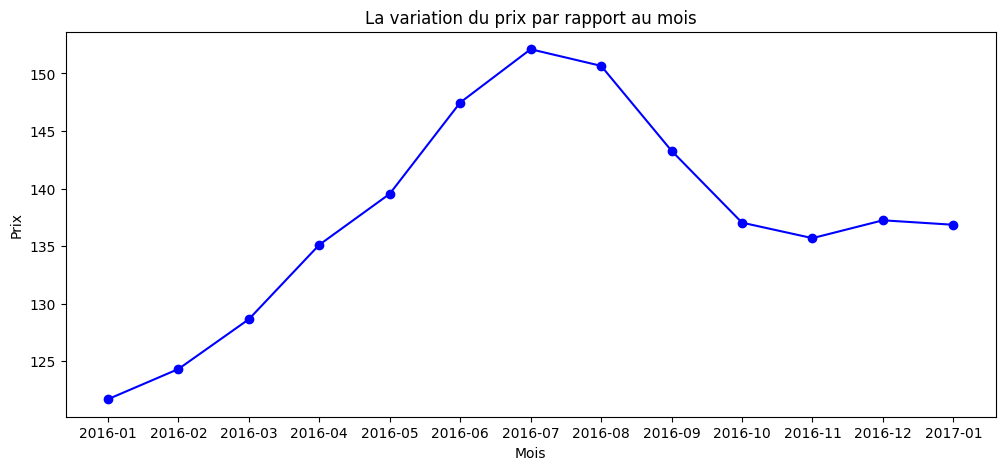

In [54]:
import matplotlib.pyplot as plt

x = grouping_month_price['month']
y = grouping_month_price['price']

# je vais convertir 'Period' en String
mois = [str(mois) for mois in x]

plt.figure(figsize=(12, 5))
plt.plot(mois, y, marker='o', linestyle='-', color='b') 
plt.title('La variation du prix par rapport au mois')
plt.xlabel('Mois') 
plt.ylabel('Prix')
#plt.legend()  

plt.show()

<ul>
  <li><b>Comme nous pouvons le voir ici, la plupart des annonces en juillet ont des prix plus élevés que ceux en janvier.</b></li>
  <li><b>Les prix passent du point le plus bas en janvier au point le plus élevé en juillet, puis redescendent jusqu'en décembre.</b></li>
</ul>
 


## Existe-t-il une relation entre le prix et le quartier ?

In [55]:
listings['neighbourhood_group_cleansed'].unique()

array(['Queen Anne', 'Ballard', 'Other neighborhoods', 'Cascade',
       'Central Area', 'University District', 'Downtown', 'Magnolia',
       'West Seattle', 'Interbay', 'Beacon Hill', 'Rainier Valley',
       'Delridge', 'Seward Park', 'Northgate', 'Capitol Hill',
       'Lake City'], dtype=object)

In [56]:
listings['price'].head(2)

0     $85.00
1    $150.00
Name: price, dtype: object

In [57]:
listings['price']=listings['price'].str[1:-3].str.replace(',','').astype(float)

In [58]:
neighbour_price=listings[['neighbourhood_group_cleansed','price']].groupby('neighbourhood_group_cleansed').mean().reset_index()

In [59]:
neighbour_price.head(2)

,neighbourhood_group_cleansed,price
0,Ballard,124.682609
1,Beacon Hill,94.669492


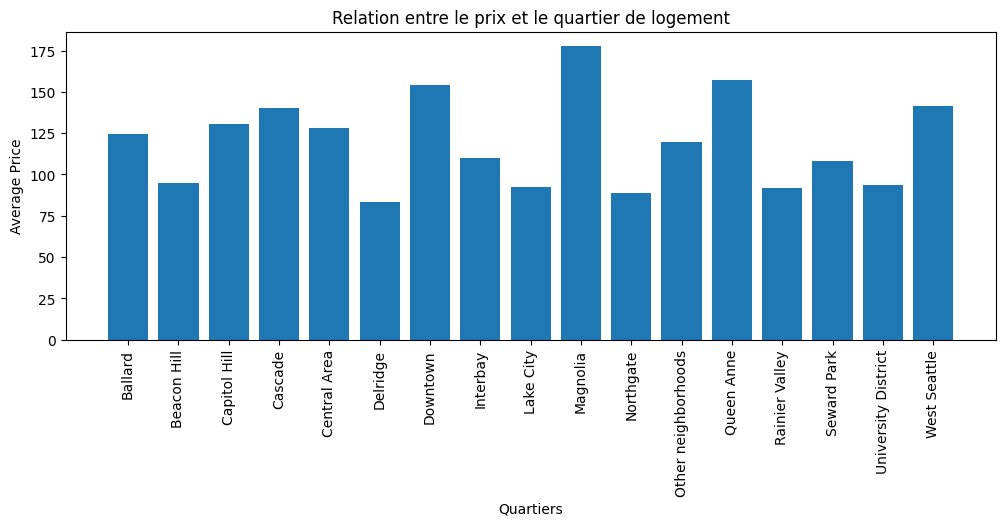

In [60]:
plt.figure(figsize=(12, 4))

plt.bar(neighbour_price['neighbourhood_group_cleansed'], neighbour_price['price'])

plt.xlabel('Quartiers')
plt.ylabel('Prix moyen')
plt.title('Relation entre le prix et le quartier de logement')
plt.xticks(rotation='vertical')
plt.show()


<ul>
<li>
    <b>Comme nous pouvons le voir ici, il est préférable d'augmenter le prix si nous listons dans Magnolia, et de le baisser si nous listons à Delridge.</b></li>
</ul>

## Existe-t-il une relation entre le prix et le nombre de chambres à coucher et de salles de bain ?

In [61]:
listings['bedrooms']

0       1.0
1       1.0
2       5.0
3       0.0
4       3.0
       ... 
3813    3.0
3814    1.0
3815    1.0
3816    0.0
3817    2.0
Name: bedrooms, Length: 3818, dtype: float64

In [62]:
bedrooms_price=listings[['bedrooms','price']].groupby(by=['bedrooms'],axis=0).mean().reset_index()

In [63]:
bedrooms_price

,bedrooms,price
0,0.0,103.548387
1,1.0,95.706247
2,2.0,174.062500
3,3.0,249.530035
4,4.0,313.695652
5,5.0,441.000000
6,6.0,578.166667
7,7.0,375.000000


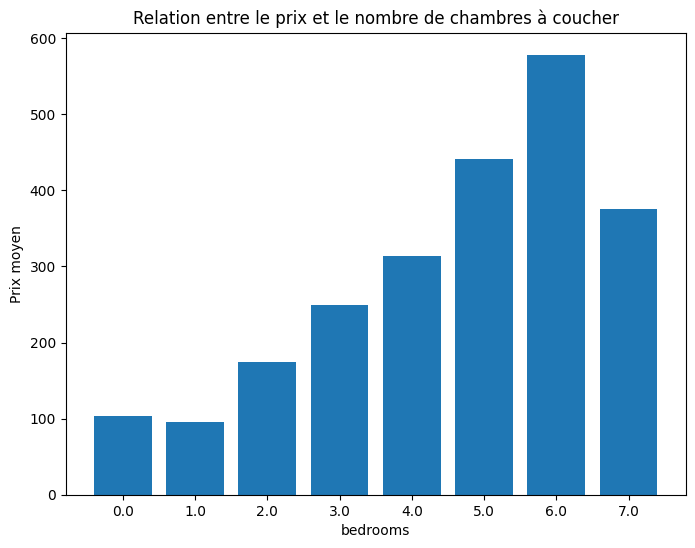

In [64]:
plt.figure(figsize=(8, 6))

plt.bar([str(x) for x in bedrooms_price['bedrooms']], bedrooms_price['price'])

plt.xlabel('bedrooms')
plt.ylabel('Prix moyen')
plt.title('Relation entre le prix et le nombre de chambres à coucher')
plt.show()

<ul>
<li>
    <b>Comme nous pouvons le voir ici, Le prix augmente avec le nombre de chambres à coucher</b></li>
</ul>

In [65]:
listings['bathrooms']

0       1.0
1       1.0
2       4.5
3       1.0
4       2.0
       ... 
3813    2.0
3814    1.0
3815    1.0
3816    1.0
3817    1.5
Name: bathrooms, Length: 3818, dtype: float64

In [66]:
bathrooms_price=listings[['bathrooms','price']].groupby(by=['bathrooms'],axis=0).mean().reset_index()

In [67]:
bathrooms_price

,bathrooms,price
0,0.0,80.375000
1,0.5,73.354839
2,1.0,106.685982
3,1.5,130.060484
4,2.0,191.737265
5,2.5,256.677419
6,3.0,275.453125
7,3.5,306.964912
8,4.0,463.750000
9,4.5,496.666667


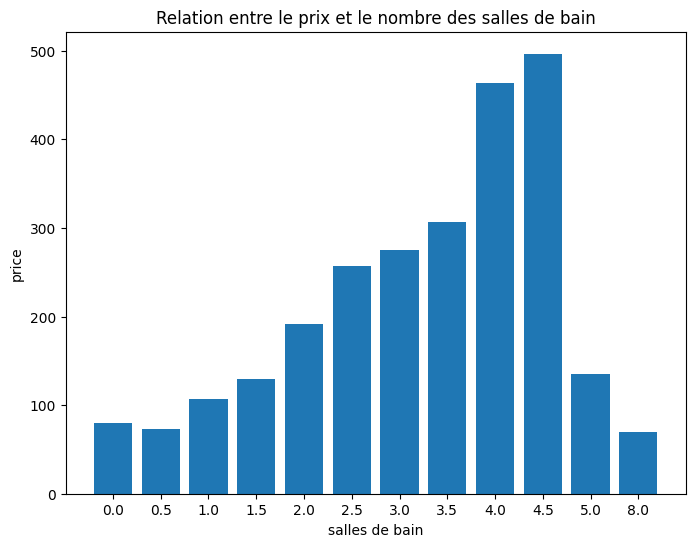

In [68]:
plt.figure(figsize=(8, 6)) 

plt.bar([str(x) for x in bathrooms_price['bathrooms']], bathrooms_price['price'])

plt.xlabel('salles de bain')
plt.ylabel('price')
plt.title('Relation entre le prix et le nombre des salles de bain')
plt.show()

<ul>
<li>
    <b>Comme nous pouvons le voir ici, le logement avec 4,5 salles de bain est le plus cher</b></li>
</ul>

### La communication de l'hôte, le temps de réponse et le taux de réponse influent-ils sur le prix ?

In [61]:
#supprimer les valeurs manquantes dans  ['host_response_time', 'host_response_rate','review_scores_communication']
sub=['host_response_time', 'host_response_rate','review_scores_communication']
communication_price=listings[['host_response_time', 'host_response_rate','review_scores_communication','price']].dropna(subset=sub,how='all')

In [62]:
communication_price.head(2)

,host_response_time,host_response_rate,review_scores_communication,price
0,within a few hours,96%,10.0,85.0
1,within an hour,98%,10.0,150.0


In [63]:
communication_price['host_response_rate']=communication_price['host_response_rate'].str[:-1].astype(float)

In [64]:
communication_price.groupby(by=['host_response_time'],axis=0).mean()

,host_response_rate,review_scores_communication,price
host_response_time,,,
a few days or more,34.789474,9.206897,129.157895
within a day,86.247906,9.773305,132.819095
within a few hours,95.898760,9.760766,133.824380
within an hour,98.705674,9.850099,116.358747


<ul>
<li>
    <b>Il n'y a pas de relation claire</b></li>
</ul>

## Correlation entre les vairables

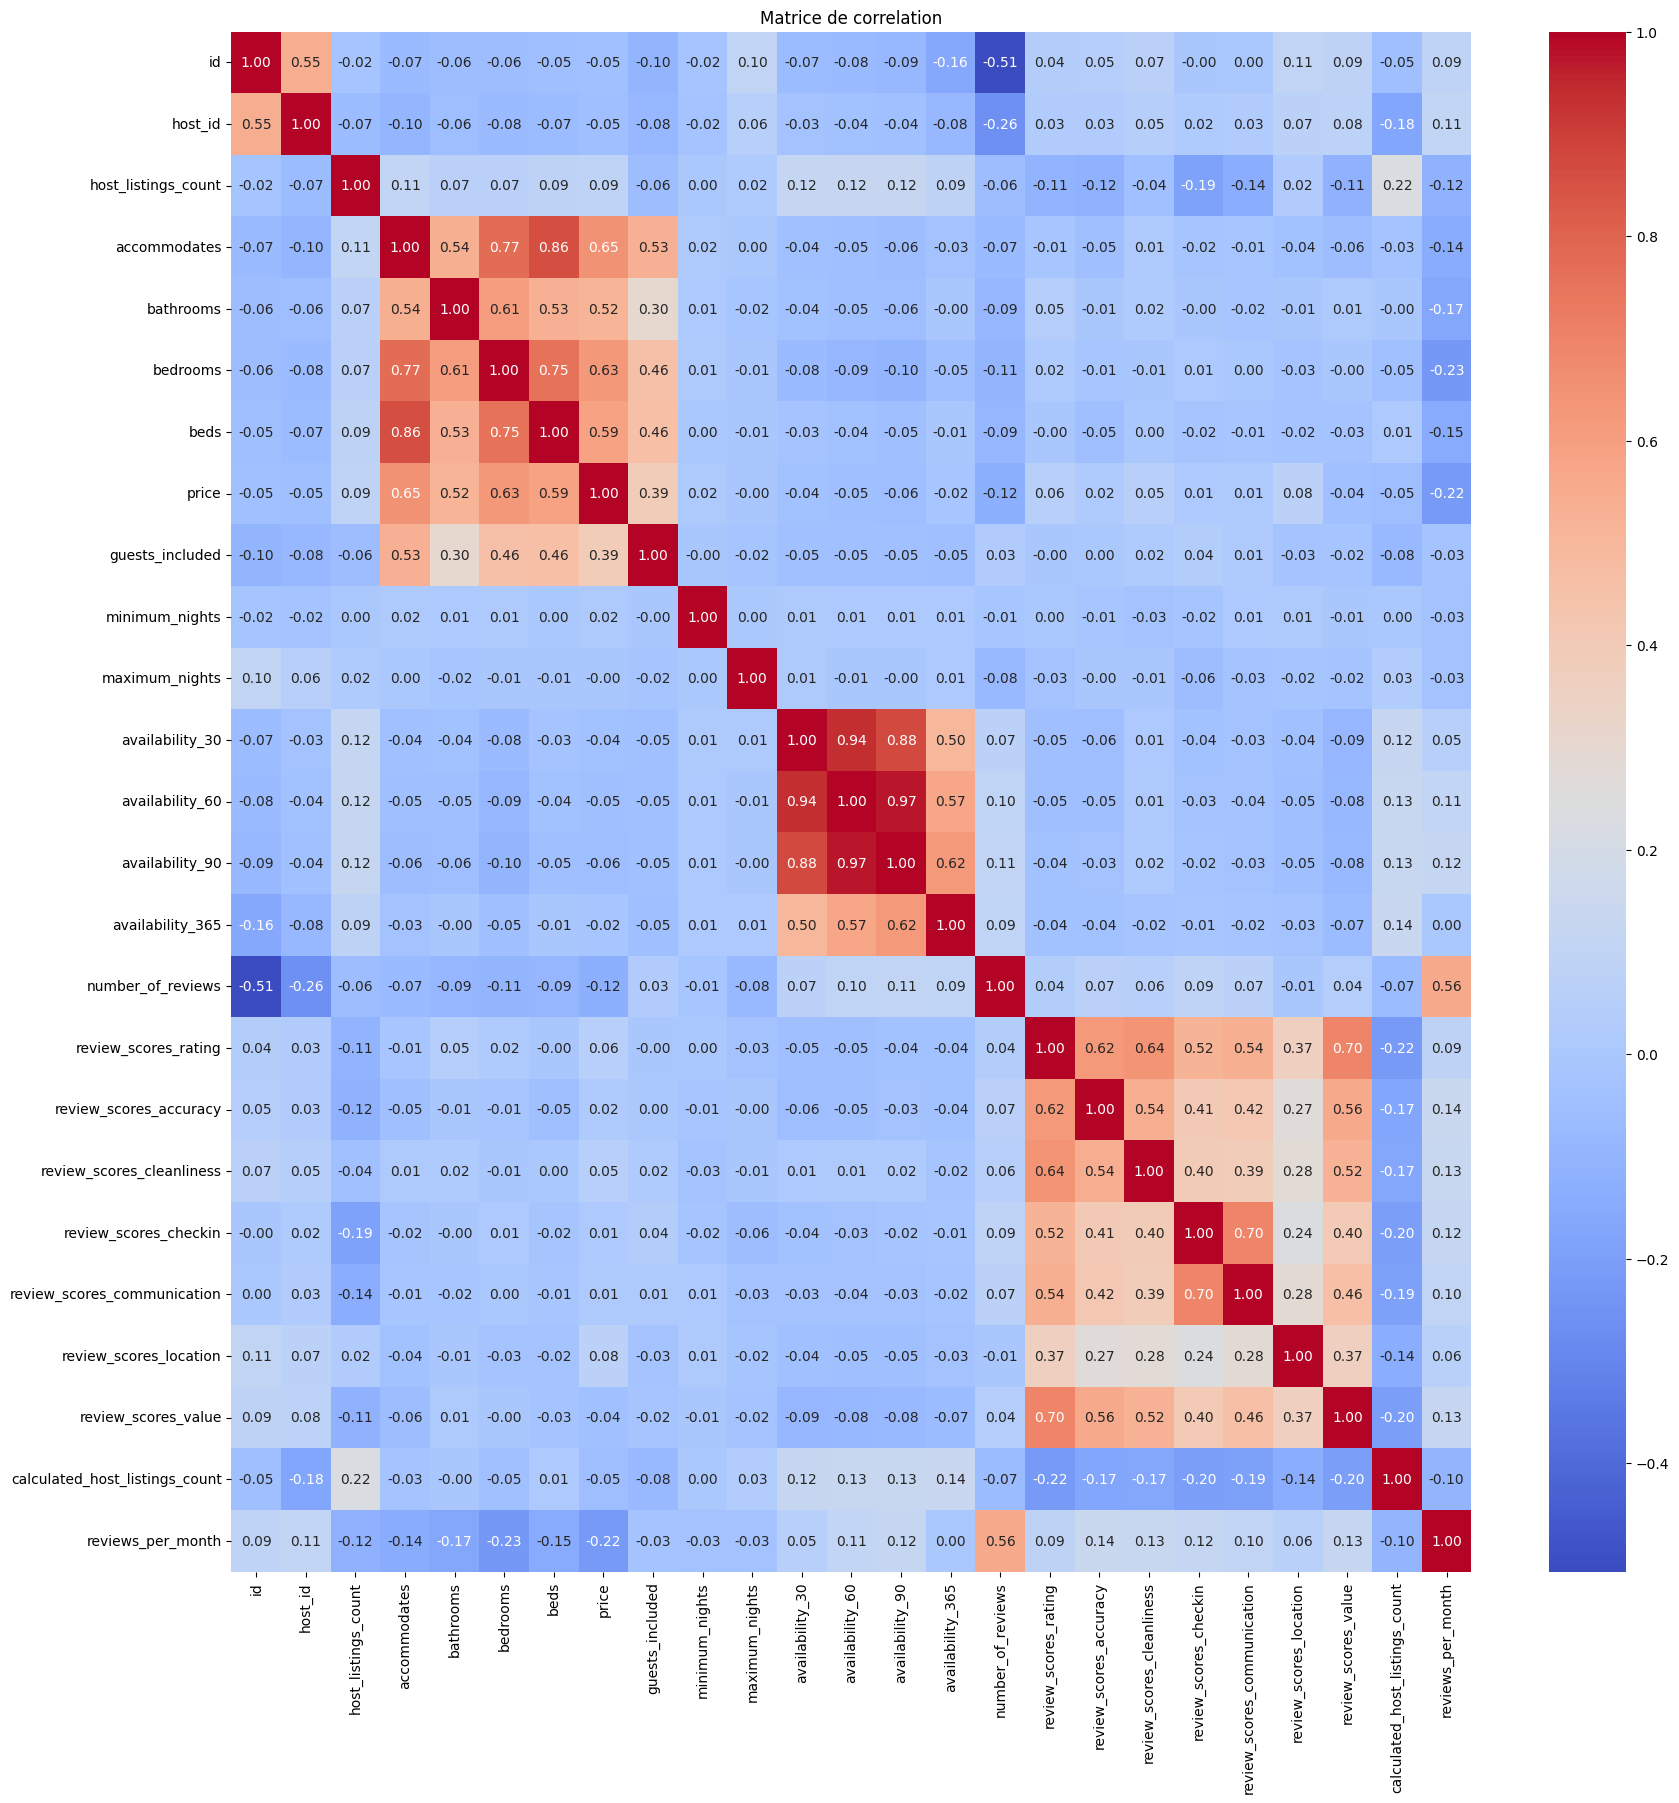

In [65]:
# Matrice de correlation
correlation_matrix = listings.corr()
import seaborn as sns

# heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de correlation')

plt.show()


<ul>
<li>
    <b>Comme nous pouvons le voir dans Heatmap,le prix est fortement corrélé avec le nombre de personnes pouvant être accueillies, le nombre de salles de bain, de chambres et de lits.</b></li>
</ul>

In [69]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scor

### Le nombre d'invités inclus influence-t-il le prix ?

In [70]:
listings['guests_included'].unique()

array([ 2,  1, 10,  6,  4,  8,  3,  7,  0,  5,  9, 11, 15, 13, 12],
      dtype=int64)

In [71]:
listings[listings['guests_included']==15]

,id,name,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
693,9282348,A bedroom close to UW,48203627,Lihua,2015-11-04,"Seattle, Washington, United States",NaN,within an hour,100%,NaN,...,NaN,NaN,NaN,NaN,t,flexible,f,f,1,NaN


Il n'y a qu'une seule ligne, je vais la supprimer.

In [72]:
listings=listings[listings['guests_included']!=15]

In [73]:
listings[listings['guests_included']==12]

,id,name,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3803,9698202,"Clean City House, Lots of Beds",5325329,Blair,2013-03-04,"Seattle, Washington, United States",My name is Blair and I'm glad you are interest...,within a few hours,97%,100%,...,10.0,10.0,10.0,10.0,f,moderate,f,f,8,4.0


In [74]:
listings=listings[listings['guests_included']!=12]

In [75]:
listings[listings['guests_included']==11]

,id,name,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
601,9738522,House of Suffrage: 5 bed sleeps 15!,754810,Andy,2011-06-28,"Seattle, Washington, United States",My wife and I are world travelers. We've trav...,within an hour,96%,100%,...,NaN,NaN,NaN,NaN,f,strict,f,f,10,NaN


In [76]:
listings=listings[listings['guests_included']!=11]

In [77]:
guests_included=listings[['guests_included','price']].groupby(by=['guests_included'],axis=0).mean().reset_index()

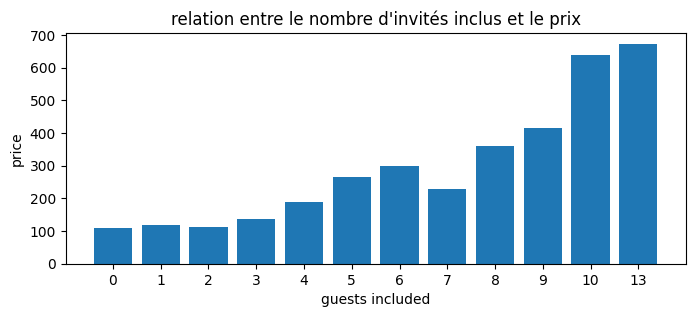

In [83]:
plt.figure(figsize=(8, 3)) 

plt.bar([str(x) for x in guests_included['guests_included']], guests_included['price'])

plt.xlabel('guests included')
plt.ylabel('price')
plt.title('relation entre le nombre d\'invités inclus et le prix')
plt.show()

<ul>
<li>
    <b>Comme nous pouvons le constater ici, si le nombre d'invités inclus est élevé, alors le prix augmente</b></li>
</ul>

In [76]:
listings['listings_count']=listings.groupby('host_id').count().reset_index()['id']

## Machine Learning

In [77]:
listings[['listings_count','price']]

,listings_count,price
0,4.0,85.0
1,1.0,150.0
2,2.0,975.0
3,1.0,100.0
4,1.0,450.0
...,...,...
3813,NaN,359.0
3814,NaN,79.0
3815,NaN,93.0
3816,NaN,99.0


D'après nos conclusions, nous allons utiliser ces attributs pour nos modèles

### 1) Data preparation

In [84]:
data = listings[['id','accommodates','bathrooms','beds','bedrooms','guests_included','neighbourhood_group_cleansed','price']]

In [85]:
calendar

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [86]:
calendar['date']=pd.to_datetime(calendar['date'])

In [95]:
calendar2 = calendar[calendar['available']!='f']

In [96]:
merged_data = pd.merge(calendar2[['listing_id','date','price']], data, left_on='listing_id', right_on='id', how='inner',suffixes=('_left', '_right'))

In [97]:
merged_data['month'] = merged_data['date'].dt.to_period('M')

In [98]:
merged_data['price'] = merged_data[['price_left', 'price_right']].mean(axis=1)

In [99]:
merged_data.drop(columns=['date','id','price_left','price_right'],inplace=True)

In [123]:
merged_data.fillna(0,inplace=True)

In [124]:
X=merged_data[['accommodates','bathrooms','bedrooms','guests_included','neighbourhood_group_cleansed','month']]

In [125]:
y=merged_data['price']

In [126]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
ohe = OneHotEncoder()
transformed = ohe.fit_transform(X[['neighbourhood_group_cleansed']]).toarray()
column_labels = np.array(ohe.categories_).ravel()
ohe_df = pd.DataFrame(transformed, columns=column_labels)
X = pd.concat([X, ohe_df], axis=1)
X.drop(columns = 'neighbourhood_group_cleansed',inplace=True)

In [127]:
X['month_string'] = X['month'].dt.strftime('%Y-%m')

In [128]:
month_map = {
    '01': 'January', '02': 'February', '03': 'March', '04': 'April',
    '05': 'May', '06': 'June', '07': 'July', '08': 'August',
    '09': 'September', '10': 'October', '11': 'November', '12': 'December'
}

X['month_name'] = X['month_string'].str.split('-').str[1].map(month_map)

In [129]:
X['month']=X['month_name']

In [130]:
transformed = ohe.fit_transform(X[['month']]).toarray()
column_labels = np.array(ohe.categories_).ravel()
ohe_df = pd.DataFrame(transformed, columns=column_labels)
X = pd.concat([X, ohe_df], axis=1)
X.drop(columns = 'month',inplace=True)

In [131]:
X.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'Ballard',
       'Beacon Hill', 'Capitol Hill', 'Cascade', 'Central Area', 'Delridge',
       'Downtown', 'Interbay', 'Lake City', 'Magnolia', 'Northgate',
       'Other neighborhoods', 'Queen Anne', 'Rainier Valley', 'Seward Park',
       'University District', 'West Seattle', 'month_string', 'month_name',
       'April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object')

In [132]:
X.drop(columns=['month_string', 'month_name'],inplace=True)

### 2) Division des données en données d'entrainement et données de test

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 3) Entrainement, test et evaluation

#### 3-1/ Lasso

In [134]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.1)
ls.fit(X_train,y_train)

Lasso(alpha=0.1)

In [135]:
y_pred_ls = ls.predict(X_test)

In [136]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred_ls)
mape=mape * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 35.15%


In [137]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_ls)
print(f"r2 score: {r2:.2f}")

r2 score: 0.58


#### 3-2/ Random Forest Regressor

In [138]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=40)

In [139]:
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=40)

In [140]:
y_pred_rf = model.predict(X_test)

In [141]:
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mape_rf= mape_rf * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")

Mean Absolute Percentage Error (MAPE): 21.15%


In [142]:
r2_rf = r2_score(y_test, y_pred_rf)
print(f"r2 score: {r2_rf:.2f}")

r2 score: 0.84


<ul>
<li>
    <b>Comme nous pouvons le voir ici, le modèle de forêt aléatoire donne de meilleurs résultats que le modèle Lasso.</b></li>
</ul>

### 4) Test du modèle avec de nouvelles données avant le déploiement.

#### Si l'hôte propose 1 nombre d'invités, 1 salle de bains, 1 chambre, 1 invité inclus, dans le quartier de Delridge et au mois d'avril.

In [50]:
data = {
    'accommodates': 1,
    'bathrooms': 1,
    'bedrooms': 1,
    'guests_included': 1,
    'Ballard': 0,
    'Beacon Hill': 0,
    'Capitol Hill': 0,
    'Cascade': 0,
    'Central Area': 0,
    'Delridge': 1,
    'Downtown': 0,
    'Interbay': 0,
    'Lake City': 0,
    'Magnolia': 0,
    'Northgate': 0,
    'Other neighborhoods': 0,
    'Queen Anne': 0,
    'Rainier Valley': 0,
    'Seward Park': 0,
    'University District': 0,
    'West Seattle': 0,
    'April': 1,
    'August': 0,
    'December': 0,
    'February':0,
    'January':0,
    'July':0,
    'June': 0,
    'March': 0,
    'May': 0,
    'November': 0,
    'October': 0,
    'September': 0
}

In [51]:
import pandas as pd
new_data1 = pd.DataFrame([data], index=[0])

In [52]:
model.predict(new_data1)

array([80.])

#### ==> Comme on vois ici, le prix est bas.

#### Et si l'hôte propose 5 nombre d'invités, 5 salle de bains, 5 chambre, 5 invité inclus, dans le quartier de Central Area et au mois de juillet.

In [46]:
data2 = {
    'accommodates': 5,
    'bathrooms': 5,
    'bedrooms': 5,
    'guests_included': 5,
    'Ballard': 0,
    'Beacon Hill': 0,
    'Capitol Hill': 0,
    'Cascade': 0,
    'Central Area': 1,
    'Delridge': 0,
    'Downtown': 0,
    'Interbay': 0,
    'Lake City': 0,
    'Magnolia': 0,
    'Northgate': 0,
    'Other neighborhoods': 0,
    'Queen Anne': 0,
    'Rainier Valley': 0,
    'Seward Park': 0,
    'University District': 0,
    'West Seattle': 0,
    'April': 0,
    'August': 0,
    'December': 0,
    'February':0,
    'January':0,
    'July':1,
    'June': 0,
    'March': 0,
    'May': 0,
    'November': 0,
    'October': 0,
    'September': 0
}

In [48]:
new_data2 = pd.DataFrame(data2, index=[0])

In [49]:
model.predict(new_data2)

array([325.25])

### Comme on vois ici, le prix est élevé.

### 4) Déploiement de modèle

In [167]:
import pickle
with open('optimisation_modele.pkl', 'wb') as file:
    pickle.dump(model, file)
